# Exercise 2 - FIR Filter Design - Solution

<a id='task_Design_Non_Recursive_Filters'></a>
<div class="alert alert-block alert-success">
<strong>Intended Learning Objectives (ILOs)</strong><br>
    
After completing this Jupyter Notebook you should be able to:
    
<ul>
<li>identify filters when given the same parameters with several windowing techniques  
</li>
    <br>
    
<li>visualise low/high pass filters using windowing techniques and group delay.
</li>
    <br>
    
<li>gain a better understanding of Finite Impulse Response System.
</li>
    <br>
    
<li>demonstrate the effects of different windowing techniques.
</li>
    <br>
    <li>understand basic use of functions from the <code>Python</code> libraries
<ul>
<li><a href="https://matplotlib.org/"><code>Matplotlib</code></a> for graphical output (like
<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html"><code>title()</code></a>,
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html"><code>xlabel()</code></a>,
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html"><code>ylabel()</code></a>,
etc.)
</li>
<li><a href="https://numpy.org/"><code>Numpy</code></a> for mathematical functions and calculations like
<a href="https://numpy.org/doc/stable/reference/generated/numpy.log10.html"><code>log10()</code></a>,
<a href="https://numpy.org/doc/stable/reference/constants.html"><code>pi()</code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.absolute.html"><code>abs()</code></a>, etc.
</li>
<li>Mostly used library for signal processing
<a href="https://docs.scipy.org/doc/scipy/reference/signal.html"><code>SciPy</code></a>
</li>
</ul>
</li>  


</ul>
</div>

Nonrecursive filters have finite impulse responses (FIRs) which means that they represent systems with an impulse response $h[k]$ limited in time. FIR systems are of finite length. All the windowing techniques are implemented into any kind of frequency response. We will be using <code>rectangular</code>, <code>hann</code>, <code>hamming</code>, <code>blackman</code> and <code>kaiser</code> windows in this jupyter notebook.

There are a number of FIR filters. They are generally categorised into four types that are antisymmetric-odd, antisymmetric-even, symmetric-odd and symmetric-even in terms of Linear Phase FIR Filters. In this exercise, design of the FIR filters are analysed in terms of only high-pass and low-pass filter based on windowing techniques. Impulse response of each filters will be plotted in the next code cell. 

In this notebook, the tasks for Exercise 2 will be solved. There are three tasks and each contains subtask. Before starting to code, few libraries need to be added.

## Libraries used in this Exercise

At the beginning, it's required to import relevant libraries into the code part.

### Scipy

SciPy is mostly used library for signal processing since it has wide range of functions and implementations. That's why we initially <code>import scipy.signal as sig</code>. There are only six functions of <code>scipy.signal</code> to be used in this exercise: 
<ol>
    <li><code>sig.windows.boxcar(Lw)</code>: This library creates <code>rectangular</code> window a.k.a <code>boxcar</code> window. The parameter <code>'Lw'</code> is equal to the filter order $m + 1$. This library will be used as <code>window = sig.windows.boxcar(Lw)</code>. After that, the variable <code>'window'</code> will be used as a parameter in the <code>bR = sig.firwin(Lw, Wn, window='boxcar')</code>. This code says that create a FIR low-pass filter that has filter order <code>'Lw'</code>, cutoff frequency <code>'Wn'</code>, and window function <code>boxcar</code> </li>
    <li><code>sig.windows.hann(Lw)</code>: This library creates <code>hann</code> window. The parameter <code>'Lw'</code> is equal to the filter order $m + 1$. This library will be used as <code>window = sig.windows.hann(Lw)</code>. After that, the variable <code>'window'</code> will be used as a parameter in the <code>bH = sig.firwin(Lw, Wn, window='hann')</code>. This code says that create a FIR low-pass filter that has filter order <code>'Lw'</code>, cutoff frequency <code>'Wn'</code>, and window function  <code>Hann</code></li>
    <li><code>sig.windows.hamming(Lw)</code>: This library creates <code>hamming</code> window. The parameter  <code>'Lw'</code> is equal to the filter order $m + 1$. This library will be used as <code>window = sig.windows.hamming(Lw)</code>. After that, the variable <code>'window'</code> will be used as a parameter in the <code>bHM = sig.firwin(Lw, Wn, window='hamming')</code>. This code says that create a FIR low-pass filter that has filter order <code>'Lw'</code>, cutoff frequency <code>'Wn'</code>, and window function <code>hamming</code></li>
    <li><code>sig.windows.blackman(Lw)</code>: This library creates <code>blackman</code> window. The parameter  <code>'Lw'</code> is equal to the filter order $m + 1$. This library will be used as <code>window = sig.windows.blackman(Lw)</code>. After that, the variable <code>'window'</code> will be used as a parameter in the <code>bB = sig.firwin(Lw, Wn, window='blackman')</code>. This code says that create a FIR low-pass filter that has filter order <code>'Lw'</code>, cutoff frequency <code>'Wn'</code>, and window function <code>'blackman'</code></li>
    <li><code>sig.windows.kaiser(22, beta = int x)</code>: This library creates <code>kaiser</code> window. The parameter  <code>'Lw'</code> is equal to the filter order $m + 1$. Second parameter is the coefficient $\beta$. In this exercise, $\beta$ will be $8$. This library will be used as <code>window = sig.windows.kaiser(Lw, beta = 8)</code>. After that, the variable <code>'window'</code> will be used as a parameter in the <code>bK = sig.firwin(Lw, Wn, window = ('kaiser', 8))</code>. This code says that create a FIR low-pass filter that has filter order <code>'Lw'</code>, cutoff frequency <code>'Wn'</code>, and window function <code>'kaiser'</code> with $\beta = 8$.</li>
     <li><code>sig.firwin(Lw, Wn, window=' ')</code>: This function creates FIR low-pass filter with a specific window. If the parameter <code>pass_zero = False</code> is added into the function <code>firwin()</code>, high-pass filter design will be created with a specified window.</li>
    <li><code>sig.freqz(b, 1, a)</code>: It computes frequency response of the filter.</li>
    <li><code>sig.group_delay((x,256))</code>: It calculates the filter's group delay. The parameter <code>x</code> comes from the function <code>firwin()</code>.</li>

</ol>

### Matplotlib.pyplot

Matplotlib is a powerful library to visualise intermediate results of our codes. It enables us to make lots of changes on the figures. It's going to be used <code>as plt</code>. In this exercise, mostly used attributes of the plt are <code>plt.figure()</code>, <code>plt.subplot()</code>, <code>plt.plot()</code>, <code>plt.title('')</code>, <code>plt.xlabel('')</code>, <code>plt.ylabel('')</code>, <code>plt.axis()</code>, <code>plt.stem()</code>, <code>plt.grid()</code>, and <code>plt.legend()</code>

<ol>
    <li><code>plt.figure()</code>: This function creates a figure with (optionally) defining a size with the parameter <code>figsize = (x,y)</code>. In this exercise, the size of the figure is set to ($x = 15$, $y = 4$) which means $15\ x \ 4$ inches for FIR design and ($x = 16$, $y = 4$) which means $16\ x \ 4$ inches for impulse responses.</li>
    <li><code>plt.subplot()</code>: This function divides the size we set in <code>figsize</code> into several parts. If we divide x-axis into two parts, for first graph it is shown as: <code>plt.subplot(1,2,1)</code>, for second graph it is shown as: <code>plt.subplot(1,2,2)</code>. So that, we can show two graphs fitted to the figsize.</li>  
    <li><code>plt.plot()</code>: The values to be plotted are specified inside the function. For example;<code>plt.plot(w1/np.pi, 20*np.log10(np.abs(hR/max(hR))),'b')</code>. The result is plotted in $dB$.</li>
    <li><code>plt.title('')</code>: As a <code>string</code> type, Title, is determined and written at the top the graph. For example; <code>plt.title('FIR Low Pass using Rectangular window')</code></li>
    <li><code>plt.xlabel('')</code>: This function puts a label into the x-axis. For example; <code>plt.xlabel('$\Omega/\pi$')</code></li>
    <li><code>plt.ylabel('')</code>: This function puts a label into the y-axis. For example; <code>plt.ylabel("$|H(exp(j*\Omega))/H(1)|$ in dB")</code></li>
    <li><code>plt.axis()</code>: This function provides us to set the limit of the x and y axis all together. For example; <code>plt.axis([0, 1, 24, 26])</code>. Here, $x$-axis ranges from $0$ to $1$ while $y$-axis ranges from $24$ to $26$.</li>
    <li><code>plt.grid()</code>: This function plots the auxiliary lines in a grid form. It has few parameters but we'll not use them at the moment. </li>
    <li><code>plt.stem()</code>: This function plots the lines in a stem form which is common to visualise discrete signals. It has few parameters to be used in the exercise. For example; <code>plt.stem(window, use_line_collection=True)</code>. It says that a specific window function will be plotted. Unless it is put <strong>True</strong>, vertical lines will not appear. </li>
    <li><code>plt.legend()</code>: This function shows elements of the figure. It has few parameters but we'll not use them at the moment. </li>
</ol>

### Numpy

Numpy is the last library that needs to be used in this exercise. It's going to be imported <code>as np</code>. Then, we'll use it now for math and calculations. In this exercise, some implementations of it is:

<ol>
    <li><code>np.abs()</code>: The absolute value is computed in this function. It's the short form of the <code>np.absolute()</code></li>
    <li><code>np.log10()</code>: It returns base $10$ logarithm. </li>
    <li><code>np.pi</code>: It is shown as $\Pi$ </li>
   
    
</ol>

Let's start to add relevant libraries into the cell. Fundamental libraries comes after the keyword <code>import</code>. Then, the keyword <code>as</code> specifies how it will be used. It makes our writing easier. For example, the library <code>numpy</code> will be used as <code>'as'</code>. It is easier to use.  

In [65]:
#Necessary libraries are added

import scipy.signal as sig           #signal processing library
import numpy as np                   #math calculations
import matplotlib.pyplot as plt      #plotting

<a id="task_function_generator_sine"></a>
<div class="alert alert-block alert-info">
    <strong><h3>Task 1: Design low-pass filters based on different windows </h3></strong><br>
<ul>
<li>
  a) Visualise (Plot) the <code>rectangular</code> <code>hann</code> and <code>hamming</code> windows in the same graph
</li>

Low-pass filters let the signals pass which have lower frequencies than the cut-off frequency $f_c$. They suppress frequencies that are higher than cut-off frequency $f_c$. Windowing techniques are used for signal enhancement. 

Let's start with rectangular window. 
<br>

\begin{equation}\label{GL5_3_29} \tag{2.1}
w^\mathrm{Rec}[k]=\left\{ \begin{array}{ll}
1& \hbox{for}\ 0\leq k \leq m\\
0&\mbox{else}
\end{array}
\right.
\end{equation}
<br>

As you see from equation ([2.1](#mjx-eqn-GL5_3_29)), there are boundaries which are the filter order $m$ and $0$. That interval between them is $k$ that represents time samples which are discrete. If samples are in that interval, the amplitude is equal to $1$ otherwise $0$.

Let's put the theory into the practical and begin with defining our variables.  

In [66]:
#Initialisation

order = 50            #coefficient m (filter order)
Wn = 0.4              #cutoff frequency
Lw = order + 1        #(m + 1)th order

The reason why it is created like this is to specify filter order separately in order to show in the time-domain graph. As you'll see, discrete time index $k$ will start from $0$ and end at filter order $m = 50$. So, there are $51$ discrete time indexes $k$ in total. It also needs to be in a <code>integer</code> type.  

Start with coding of <code>Rectangular</code> window.


#### Rectangular(Boxcar) Window

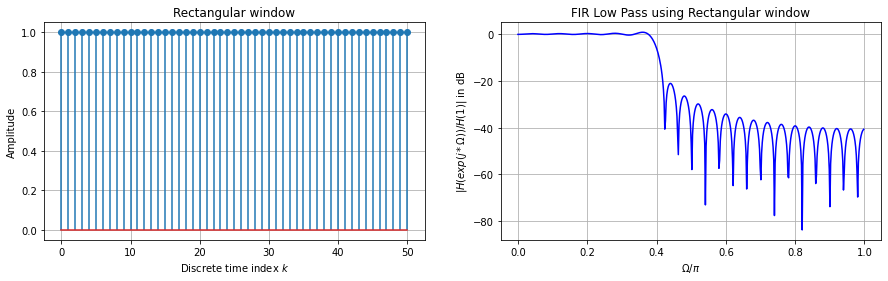

In [67]:
window = sig.windows.boxcar(Lw)                         #get the window.(since m = 50, m + 1 = 51 filter coefficients are generated)
bR = sig.firwin(Lw, Wn, window='boxcar')                #FIR filter design using boxcar (rectangular window) 
w1, hR = sig.freqz(bR, 1, 512)                          #compute frequency response of the filter

plt.figure(figsize=(15,4))                              #set the size of the figure

#Plotting time domain graph of Rectangular window
plt.subplot(1,2,1)                                      #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.stem(window, use_line_collection=True)              #plot the window with stem lines
plt.ylabel("Amplitude")                                 #plot        
plt.xlabel("Discrete time index $k$")                   #time index k is shown as discrete
plt.title("Rectangular window")                         #put title of the figure on the left 
plt.grid()                                              #configure the grid lines

#Plotting FIR Low Pass using Rectangular window
plt.subplot(1,2,2)                                      #2nd plot of the 2 plots. (It's gonna be visualised on the right)
plt.plot(w1/np.pi, 20*np.log10(np.abs(hR/max(hR))),'b') #plotting of the FIR Low Pass  
plt.ylabel("$|H(exp(j*\Omega))/H(1)|$ in dB")           #absolute value of the spectrum in dB     
plt.xlabel("$\Omega/\pi$")                              #Omega/pi                          
plt.title("FIR Low Pass using Rectangular window")      #put title of the figure on the right 
plt.grid()                                              #configure the grid lines



The figure on the left visualises the time-domain representation of the <code>boxcar</code> window. As you remember from the notebook <code>'Exercise 1 - Window functions'</code> it resembles a rectangle. The function ([2.1](#mjx-eqn-GL5_3_29)) describes us the time-amplitude representation of the <code>boxcar</code> window. 

The figure on the right depicts the FIR low-pass filter design with <code>rectangular</code> window. In the task, the cut-off frequency $W_n$ is specified as $0.4$. It means that the filter will let the frequencies pass till $0.4$. After that it starts to be suppressed. Therefore, the frequencies between $0$ and $0.4$ is called as passband. 

The coefficients of the finite impulse response (FIR) filter is $h(k)$. Since number of the discrete time indexes $k = 51$ , the number of the coefficients are $51$ as well. The function <code>sig.firwin()</code> calculates and shows FIR filter's coefficients. If you put <code>bR</code> at the end of the code above, you will see the values of the coefficient $h(k)$ in the array form. These are also called $'impulse$ $response'$. You will observe that there are $51$ coefficients. Now, the coefficients are straightforward, $h(k)$ = $bR$. Then, these coefficients,<code>bR</code>, are put into the function <code>'sig.freqz(bR, 1, 512)'</code> in order to compute filter's frequency response. It is quite important to analyse filter's behaviour. If we put $e^{jw}$ instead of $z$ in $H(z)$, we can calculate and see the filter's frequency response.      


Let's look at impulse response $h(k)$ 

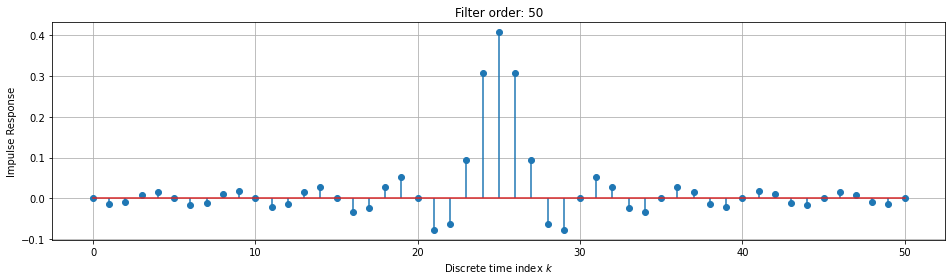

In [68]:
#Impulse Response of the Rectangular window for order m = 50

plt.figure(figsize=(16,4))                   #set the size of the figure

plt.stem(bR, use_line_collection=True)       #plotting impulse response with stem lines
plt.ylabel("Impulse Response")               #put name of y label
plt.xlabel("Discrete time index $k$")        #put name of x label
#plt.axis([0, 50, -1, 1])
plt.title("Filter order: " + str(Lw-1))      #substract 1 from Lw to show filter order in the title
plt.grid()                                   #configure the grid lines


In the previous code part, it is stated that the coefficient $h(k)$ is the impulse response of the filter. It can be seen from the figure that impulse response is symmetric for even filter order $m$. Therefore, it can be also called as Type 1 - Linear Phase filter a.k.a Even Symmetric. Let's look at the values of the impulse response at the table below:

| **$k$** 	| **Symmetric $k$** 	|  **$h[k]$ (Scientific notation)** 	|
|:--------:	|:-----------------:|:------------:	|
| $k[0]$   	| $k[50]$           	|-1.58701700e-17|
| $k[1]$   	| $k[49]$           	| -1.28382498e-02      	|
| $k[2]$   	| $k[48]$           	| -8.27945187e-03      	|
| $k[3]$   	| $k[47]$           	| 8.65579059e-03       	|
| $\vdots$  |$\vdots$           | $\vdots$     	|
| $k[24]$   	| $k[26]$           	| 3.08117994e-01       |
| $k[25]$  	|  $-$           	    | 4.07118278e-01      	|

Centre value $c = h[k/2] = h[25] = 0.407$. As you move from the center to the edges, the values slowly get closer to $0$. 

    
                   
      

#### Hann window

The <code>Hann</code> window is effective in terms of preventing discontinuities in the signal. It's frequently used in signal processing algorithms. 

Window function the <code>Hann</code> window is shown as:

\begin{equation} \tag{2.2} %Hann window 
\label{GL5_3_34}
w^\mathrm{Hn}[k]= \left \{
\begin{array}{ll}
\frac{1}{2} \left(1-\cos \frac{2\pi}{m} k \right) & \hbox{for}\  0 \leq k \leq  m \\
 0  & \hbox{else;}
\end{array}
\right.
\end{equation}


So, there is $\cos$ function used here. Let's see the effect of this.

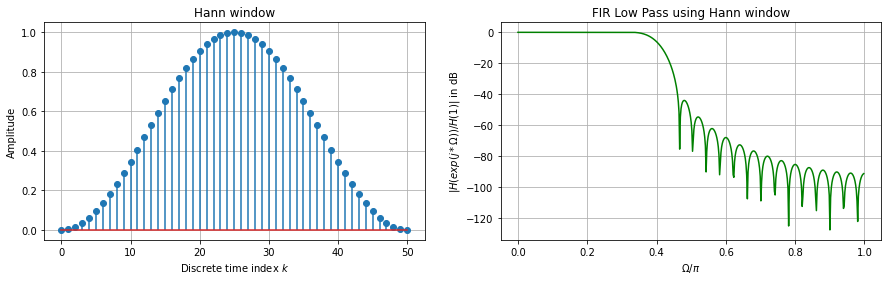

In [69]:
window = sig.windows.hann(Lw)                           #get the window.(since m = 50, m + 1 = 51 filter coefficients are generated)
bH = sig.firwin(Lw, Wn, window='hann')                  #FIR filter design using Hann window
w2, hH  = sig.freqz(bH, 1, 512)                         #computing frequency response of the filter

plt.figure(figsize=(15,4))                              #set the size of the figure

#Plotting time domain graph of Hann window
plt.subplot(1,2,1)                                      #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.stem(window, use_line_collection=True)              #plot the window with stem lines
plt.ylabel("Amplitude")                                 #put name of y label
plt.xlabel("Discrete time index $k$")                   #put name of x label
plt.title("Hann window")                                #put title of the figure on the left 
plt.grid()                                              #configure the grid lines

#Plotting FIR Low Pass using Hann window
plt.subplot(1,2,2)                                      #2nd plot of the 2 plots. (It's gonna be visualised on the right)
plt.plot(w2/np.pi, 20*np.log10(np.abs(hH/max(hH))),'g') #Plotting of the FIR Low Pass using frequency response 
plt.ylabel("$|H(exp(j*\Omega))/H(1)|$ in dB")           #absolute value of the spectrum in dB
plt.xlabel("$\Omega/\pi$")                              #omega/pi
plt.title("FIR Low Pass using Hann window")             #put title of the figure on the right 
plt.grid()                                              #configure the grid lines



When you look at the edges in the time domain graph, <code>Hann</code> window reaches them. Also, as you can see in the FIR Low-pass filter of the window, there is a noticeable difference compared to <code>rectangular</code> window. 

| **$\Omega/\pi$** 	| **20 np.log10(np.abs(hHM/max(hHM)))** 	|
|:-----------------:|:-----------------------------------------:|
|        $0$   	    | $-5.41662535e-02$                          	|
|        $0.00195312$     | $-5.41765696e-02$                       |
|        $0.00390625$   	| $-5.42072847e-02$                       |
|        $0.00585938$   	| $-5.42577043e-02$                       |
|    $\vdots$           |  $\vdots$                             |
|        $0.99609375$   	| $-9.15697170e+01$                       |
|        $0.99804687$   	| $-9.12550609e+01$                       |

When you put the <code>20*np.log10(np.abs(hH/max(hH)))</code> at the end of the code above, you will see amplitudes in $dB$ in the array form. It shows that amplitude values are so close to $0$ until the cut-off frequency $W_n = 0.4$. After cut-off frequency $W_n$ the values will decrease. As you see from the table above, normalised frequency $\Omega/\pi$ value is $0.998$, the amplitude is $-91$ $dB$. 

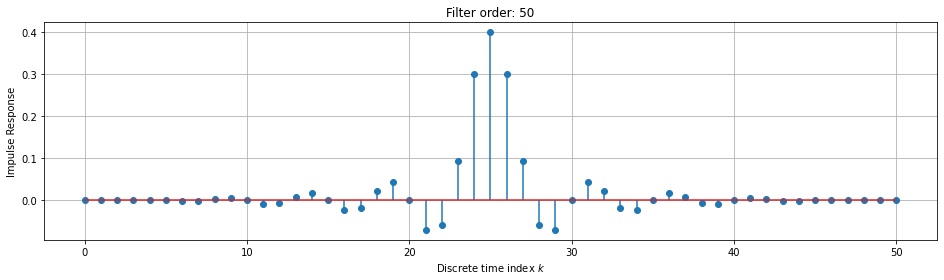

In [70]:
#Impulse Response of the Hann window for order m = 50

plt.figure(figsize=(16,4))                    #set the size of the figure

plt.stem(bH, use_line_collection=True)        #plotting impulse response with stem lines
plt.ylabel("Impulse Response")                #put name of y label
plt.xlabel("Discrete time index $k$")         #put name of x label
#plt.axis([0, 50, -1, 1])
plt.title("Filter order: " + str(Lw-1))       #substract 1 from Lw to show filter order in the title
plt.grid()                                    #configure the grid lines


In the previous code part, it is stated that the coefficient $h(k)$ is the impulse response of the filter. It can be seen from the figure that impulse response is a symmetric for even filter order $m$. Therefore, it can be also called as Type 1 - Linear Phase filter a.k.a Even Symmetric.

| **$k$** 	| **Symmetric $k$** 	|  **$h[k]$ (Scientific notation)** 	|
|:--------:	|:-----------------:|:------------:	|
| $k[0]$   	| $k[50]$           	|-0.00000000e+00|
| $k[1]$   	| $k[49]$           	| -4.97267379e-05      	|
| $k[2]$   	| $k[48]$           	| -1.27770346e-04      	|
| $k[3]$   	| $k[47]$           	|  2.98576279e-04       	|
| $\vdots$  |$\vdots$           | $\vdots$     	|
| $k[24]$   	| $k[26]$           	| 3.01507003e-01       |
| $k[25]$  	|  $-$           	    | 3.99960035e-01      	|



   
Centre value $c = h[k/2] = h[25] = 0.399$. As you move from the $k = 25$ to the $k = 50$, the values fastly get closer to $0$ same as going from $k = 25$ to $k = 0$ due to the symmetry property. 

#### Hamming Window

The <code>Hamming</code> window is another popular windowing technique along with the <code>Hann</code> window. It is typically used in the MFCC algorithm which is used for front-end applications in speech technology.


\begin{equation}\label{GL5_3_39} \tag{2.3} %Hamming window 
w^\mathrm{Hm}[k] =  \left[ 0,54 - 0,46 \cos \left(\frac{2\pi}{m}k \right) \right]\cdot w^\mathrm{R}[k] \,
\end{equation}




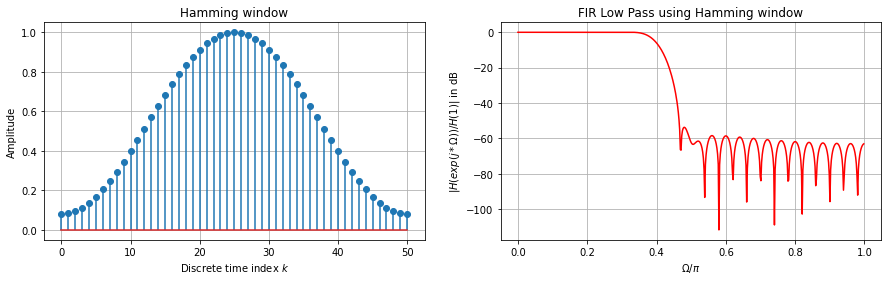

In [71]:
window = sig.windows.hamming(Lw)                          #get the window.(since m = 50, m + 1 = 51 filter coefficients are generated)
bHM = sig.firwin(Lw, Wn, window = 'hamming')              #FIR filter design using Hamming window
w3, hHM  = sig.freqz(bHM, 1, 512)                         #compute frequency response of the filter

plt.figure(figsize=(15,4))                                #set the size of the figure
 
#Plotting time domain graph of Hamming window
plt.subplot(1,2,1)                                        #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.stem(window, use_line_collection=True)                #plot the window with stem lines
plt.ylabel("Amplitude")                                   #put name of y label
plt.xlabel("Discrete time index $k$")                     #put name of x label
plt.title("Hamming window")                               #put title of the figure on the left 
plt.grid()                                                #configure the grid lines

#Plotting FIR Low Pass using Hamming window
plt.subplot(1,2,2)                                        #2nd plot of the 2 plots.(It's gonna be visualised on the right)
plt.plot(w3/np.pi, 20*np.log10(np.abs(hHM/max(hHM))),'r') #Plotting of the FIR Low Pass using frequency response 
plt.ylabel("$|H(exp(j*\Omega))/H(1)|$ in dB")             #absolute value of the spectrum in dB
plt.xlabel("$\Omega/\pi$")                                #Omega/pi
plt.title("FIR Low Pass using Hamming window")            #put title of the figure on the right 
plt.grid()                                                #configure the grid lines


As you can see from the time-domain representation, you can notice the difference between <code>Hamming</code> and <code>Hann</code> window looking at the edges. What can we deduce from this? Hamming window doesn't reach the endpoints. We can say that <code>Hann</code> window has better performance in terms of discontinuities and spectral leakage. 

The figure on the right depicts the representation of FIR low-pass filter using <code>Hamming</code> window. Again, the cut-off frequency $W_n$ is $0.4$ here. Let's see the values of the magnitude in $dB$ at the table below.

| **$\Omega/\pi$** 	| **20 np.log10(np.abs(hHM/max(hHM)))** 	|
|:-----------------:|:-----------------------------------------:|
|        $0$   	    | $-2.64918216e-02$                          	|
|        $0.00195312$     | $-2.63581459e-02$                       |
|        $0.00390625$   	| $-2.59602552e-02$                       |
|        $0.00585938$   	| $-2.53074856e-02$                       |
| $\vdots$              |$\vdots$                               |
|        $0.99609375$   	| $-6.33629561e+01$                       |
|        $0.99804687$   	| $-6.30498502e+01$                       |

When you put the <code>20*np.log10(np.abs(hHM/max(hHM)))</code> at the end of the code above, you will see amplitudes in $dB$ in the array form. It shows that amplitude values are so close to $0$ until the cut-off frequency $W_n = 0.4$. After cut-off frequency $W_n = 0.4$ the values will decrease. As you see from the frequency domain representation above when the normalised frequency $\Omega/\pi$ is 0, the amplitude is $0.026$ in $dB$. When the the normalised frequency $\Omega/\pi$ is $0.998$, the amplitude is $-63$ in $dB$. 

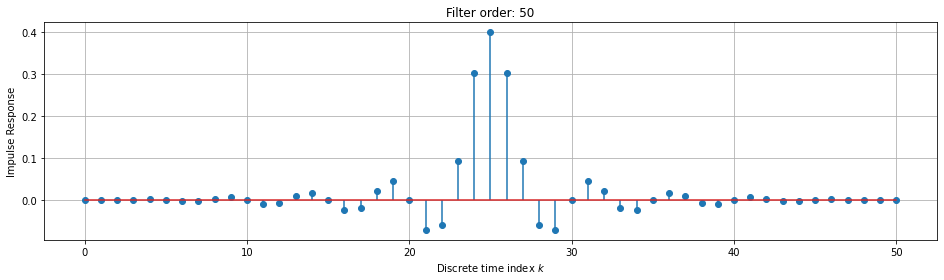

In [72]:
#Impulse Response of the Hamming window for order m = 50

plt.figure(figsize=(16,4))                  #set the size of the figure
plt.stem(bHM, use_line_collection=True)     #plotting impulse response with stem lines
plt.ylabel("Impulse Response")              #put name of y label
plt.xlabel("Discrete time index $k$")       #put name of x label
#plt.axis([0, 50, -1, 1])
plt.title("Filter order: " + str(Lw-1))     #substract 1 from Lw to show filter order in the title
plt.grid()                                  #configure the grid lines


Let's plot three of them in the same graph.

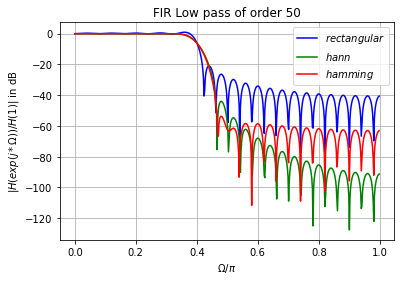

In [73]:
#Plotting of FIR low pass with different windows in the same graph

plt.plot(w1/np.pi, 20*np.log10(np.abs(hR/max(hR))),'b', label='$rectangular$')     #rectangular
plt.plot(w2/np.pi, 20*np.log10(np.abs(hH/max(hH))),'g', label='$hann$')            #hann
plt.plot(w3/np.pi, 20*np.log10(np.abs(hHM/max(hHM))),'r', label='$hamming$')       #hamming

plt.xlabel('$\Omega/\pi$')                       #Omega/pi    
plt.ylabel("$|H(exp(j*\Omega))/H(1)|$ in dB")    #absolute value of the spectrum in dB
#plt.axis([0, 1, -150, 0])

plt.title('FIR Low pass of order ' + str(order)) #put title of the figure for order m 
plt.grid()                                       #configure the grid lines
plt.legend()                                     #describe elements of the graph


In the figure above, the amplitude responses of the filter for order  $m = 50$  are plotted. It shows the normalised <i>cut-off frequency $\Omega_c/\pi = 0.4$ </i>, which is used for <code>rectangular (boxcar)</code>, <code>hann</code> and <code>hamming</code> windowing techniques. 

<a id="task_function_generator_sine"></a>
<div class="alert alert-block alert-info">
 <li>
    b) Plot <code>blackman</code> and <code>kaiser</code> windows in the same graph. Note: In kaiser windowing, put parameter $\beta = 8$.
</li>
</div>

#### Blackman Window



The <code>Blackman</code> window function is as follows:



\begin{equation}\label{GL5_3_40} \tag{2.4} %Blackman window 
w^\mathrm{Bl}[k] = \left[0,42 - 0,5 \cos \frac{2\pi}{m} k + 0,08 \cos \frac{4\pi}{m} k \right]\cdot w^\mathrm{R}[k]
\end{equation}


As you can see from the equation ([2.4](#mjx-eqn-GL5_3_40)) that there is additional cosine term compared to other window functions. So, Let's observe how it results in the graph.

First, let's start with coding window.

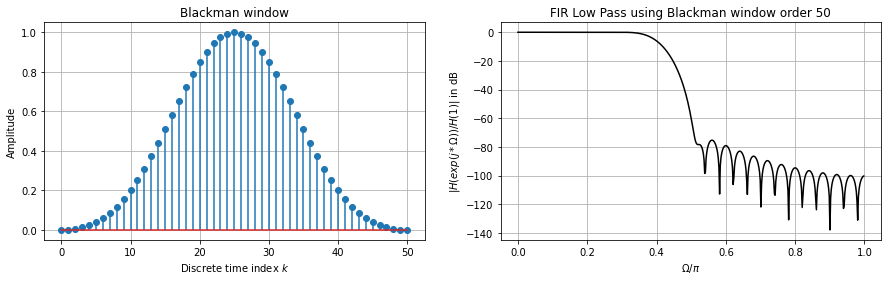

In [74]:
window = sig.windows.blackman(Lw)              #get the window.(since m = 50, m + 1 = 51 filter coefficients are generated)
bB = sig.firwin(Lw, Wn, window = 'blackman')   #FIR filter design using Blackman window
w4, hB  = sig.freqz(bB, 512)                   #compute frequency response of the filter

plt.figure(figsize=(15,4))                     #set the size of the figure

#Plotting time domain of the Blackman window
plt.subplot(1,2,1)                             #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.stem(window, use_line_collection=True)     #plot the window with stem lines
plt.ylabel("Amplitude")                        #put name of y label
plt.xlabel("Discrete time index $k$")          #put name of x label
plt.title("Blackman window")                   #put title of the figure on the left 
plt.grid()                                     #configure the grid lines

#Plotting FIR Low Pass using Blackman window
plt.subplot(1,2,2)                             #2nd plot of the 2 plots.(It's gonna be visualised on the right)
plt.plot(w1/np.pi, 20*np.log10(np.abs(hB/max(hB))),'black', label='blackman') #plotting of the FIR Low Pass using frequency response 
plt.ylabel("$|H(exp(j*\Omega))/H(1)|$ in dB")  #absolute value of the spectrum in dB
plt.xlabel("$\Omega/\pi$")                     #Omega/pi
plt.title("FIR Low Pass using Blackman window order " +str(order))  #put title of the figure on the right 
plt.grid()                                     #configure the grid lines  


The figure on the left shows the time-domain represetation of the <code>Blackman</code> window. When the <code>Blackman</code> window is used instead of the <code>Hamming</code> window, the resulting FIR filter has less maximum stop-band ripple. The figure on the right shows the FIR low-pass filter representation for order $m = 50$. 



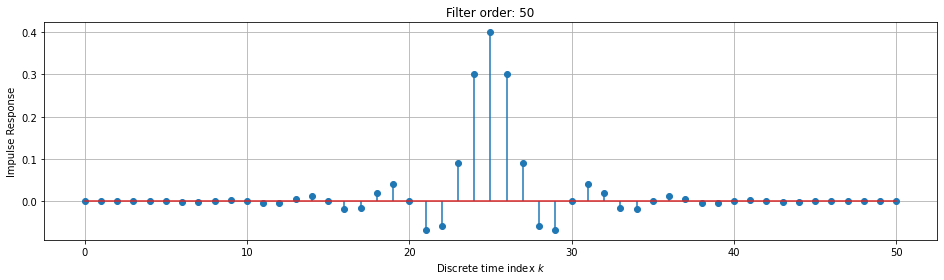

In [75]:
#Impulse Response of the Blackman window for order m = 50

plt.figure(figsize=(16,4))              #set the size of the figure
plt.stem(bB, use_line_collection=True)  #plotting impulse response with stem lines
plt.ylabel("Impulse Response")          #put name of y label
plt.xlabel("Discrete time index $k$")   #put name of x label
#plt.axis([0, 50, -1, 1])
plt.title("Filter order: " + str(Lw-1)) #substract 1 from Lw to show filter order in the title
plt.grid()                              #configure the grid lines


 This figure shows the impulse response for discrete time index $k = 51$. 

#### Kaiser Window

There is an important difference between <code>Kaiser</code> window and other windows. This is the $\beta$ coefficient.

Window function is as follows:

\begin{equation}\label{GL5_3_41} \tag{2.5} %Kaiser window 
w^\mathrm{K}[k] = \frac{I_0\bigg ( \beta  \sqrt{1- \left(1-\frac{2}{m}k \right)^2}\bigg )}{I_0\left(\beta \right)}
\cdot w^\mathrm{R}[k]
\end{equation}


Let's code. It shouldn't be forgotten to add $\beta = 8$ parameter into the function.

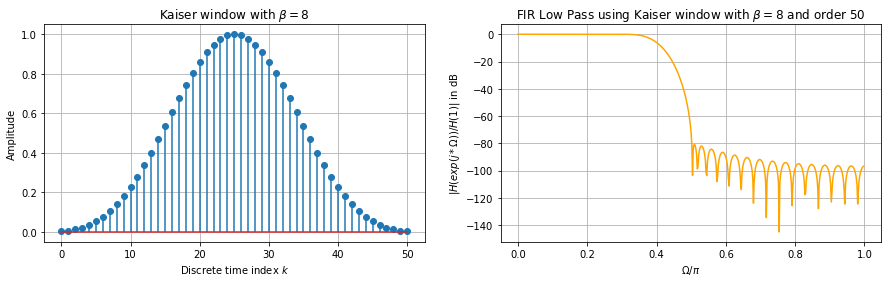

In [76]:
window = sig.windows.kaiser(Lw, beta = 8)       #get the window.(since m = 50, m + 1 = 51 filter coefficients are generated)
bK = sig.firwin(Lw, Wn, window = ('kaiser', 8)) #FIR filter design using Kaiser window with beta = 8
w5, hK = sig.freqz(bK, 512)                     #computing frequency response of the filter

plt.figure(figsize=(15,4))                      #set the size of the figure

#here we are plotting time domain of the Kaiser window

plt.subplot(1,2,1)                              #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.stem(window ,use_line_collection=True)      #plot the window with stem lines
plt.ylabel("Amplitude")                         #put name of y label
plt.xlabel("Discrete time index $k$")           #put name of x label
plt.title(r'Kaiser window with $\beta = 8$')    #put title of the figure on the left
plt.grid()                                      #configure the grid lines 

#Plotting FIR Low Pass using Kaiser window with beta = 8, order 50

plt.subplot(1,2,2)                              #2nd plot of the 2 plots.(It's gonna be visualised on the right)
plt.plot(w2/np.pi, 20*np.log10(np.abs(hK/max(hK))),'orange', label=r'kaiser with $\beta$ = 8') #kaiser with beta = 8
plt.ylabel("$|H(exp(j*\Omega))/H(1)|$ in dB")   #absolute value of the spectrum in dB
plt.xlabel("$\Omega/\pi$")                      #Omega/pi
plt.title(r"FIR Low Pass using Kaiser window with $\beta = 8$ and order " + str(order)) #put title of the figure on the right
plt.grid()                                      #configure the grid lines




The figure on the left shows discrete time-amplitude representation of the Kaiser window for $\beta = 8$.  

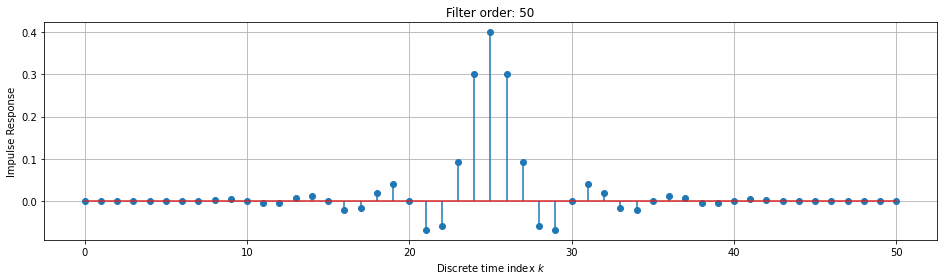

In [77]:
#Impulse Response of the Kaiser window for order m = 50, beta = 8

plt.figure(figsize=(16,4))               #set the size of the figure
plt.stem(bK, use_line_collection=True)   #plotting impulse response with stem lines 
plt.ylabel("Impulse Response")           #put name of y label
plt.xlabel("Discrete time index $k$")    #put name of x label
#plt.axis([0, 50, -1, 1])
plt.title("Filter order: " + str(Lw-1))  #substract 1 from Lw to show filter order in the title
plt.grid()                               #configure the grid lines


 Let's plot the two filters on the same graph.

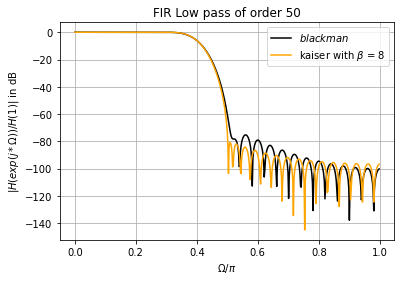

In [78]:
#Plotting of FIR low pass with two windows in the same graph

plt.plot(w1/np.pi, 20*np.log10(np.abs(hB/max(hB))),'black', label='$blackman$')                  #plot blackman
plt.plot(w2/np.pi, 20*np.log10(np.abs(hK/max(hK))),'orange', label=r'kaiser with $\beta$ = 8') #plot kaiser with beta = 8

plt.xlabel('$\Omega/\pi$')                       #Omega/pi
plt.ylabel("$|H(exp(j*\Omega))/H(1)|$ in dB")    #absolute value of the spectrum in dB
#plt.axis([0, 1, -150, 0])

plt.title('FIR Low pass of order ' + str(order)) #put title of the figure
plt.grid()      #configure the grid lines
plt.legend()    #describe elements of the graph



<div class="alert alert-block alert-warning">
<p><strong>Remark: </strong>A comparison between the amplitude responses shows the problem of compromising the highest first shot attenuation possible and the smallest possible pass band. If we consider the trend of the <code>Kaiser</code>- against the <code>Blackman-window</code>, it is an advantage to know the free parameter. At almost similar steepness of the transition, the <code>Kaiser-window</code> have a small pass-band, ( $\Omega_s/\pi$ $\approx 0.5$ against $\Omega_s/\pi$ $\approx 0.55$) and at the same time a better first shot ( $a_N \approx 83\,\mathrm{dB}$ against $a_N \approx 75\,\mathrm{dB}$ ).</p>
</div>

Task 1 is completed. Codes and necessary explanations are specified. Time to begin with high-pass filter. You will see the certain difference between low-pass and high-pass filter. When you put the variables at the end of the code part, it will be easier to understand.

<a id="task_function_generator_sine"></a>
<div class="alert alert-block alert-info">
    <strong><h3>Task 2: Design a high pass filter</h3></strong><br>
<ul>
<li>
 a) Design a high-pass filter of order $m= 33$ and cut-off frequency $W_n = 0.4$ using the Python function <code>firwin()</code> using Hamming window and plot the frequency response.
</li>

High-pass filters let the signals pass which have higher frequencies than cut-off frequency. It suppresses frequencies that are lower than cut-off frequency $W_n$.

In [79]:
order = 33   #coefficient m (filter order)
Wn = 0.4     #cutoff frequency

Filter order $m$ is changed to $33$. Cut-off frequency $W_n$ stays same. 

In [80]:
x = sig.firwin(order, Wn, window='hamming', pass_zero=False) #FIR filter design using hamming window 
w, h = sig.freqz(x, 1, 512)                                  #computing frequency response of the filter

There is an additional parameter <code>'pass_zero=False'</code> here. For this parameter, the function <code>sig.firwin()</code> will create high-pass filter. Later, it will be used in the function <code>sig.freqz(x, 1, 512)</code> in order to compute frequency response of the filter. 

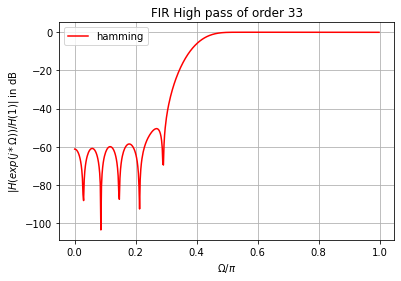

In [81]:
plt.plot(w/np.pi, 20*np.log10(np.abs(h/max(h))),'r', label='hamming') #Plotting of the FIR High Pass using frequency response 

plt.xlabel('$\Omega/\pi$')                        #Omega/pi
plt.ylabel("$|H(exp(j*\Omega))/H(1)|$ in dB")     #absolute value of the spectrum in dB

plt.title('FIR High pass of order ' + str(order)) #put title of the figure 
plt.grid()                                        #configure the grid lines
plt.legend()                                      #describe elements of the graph


The generated transfer function shows the amplitude response representation of a high-pass for filter order $m = 33$ and a normalised cutoff frequency $\Omega_c/\pi$ = $0.4$. <code>Hamming</code> window is used here. Let's analyse the absolute values of the spectrum in $dB$. When you put <code>w</code> at the end of the code part, you will see the normalised frequencies in the array form. There are $512$ values totally. The values of normalised frequencies are same with frequencies previous ones. Likewise, when you put <code>20*np.log10(np.abs(h/max(h)))</code> at the end of the code above you will see the absolute values in $dB$ of the filter. Let's look at the table below.


| **$w/np.pi$** 	| **20*np.log10(np.abs(h/max(h)))** 	|
|:-----------------:|:-----------------------------------------:|
|        $0$   	    | $-6.12570454e+01$                          	|
|        $0.00195312$     | $-6.13071637e+01$                       |
|        $0.00390625$   	| $-6.14587036e+01$                       |
|        $0.00585938$   	| $-6.17153341e+01$                       |
| $\vdots$              |$\vdots$                               |
|        $0.99609375$   	|  $4.04278534e-04$                       |
|        $0.99804687$   	|  $1.66020894e-04$                       |

At the normalised frequency $\Omega/\pi = 0$, the absolute value starts with $-61$ $dB$. In the transition band, the absolute values approach to $0$ fastly. 



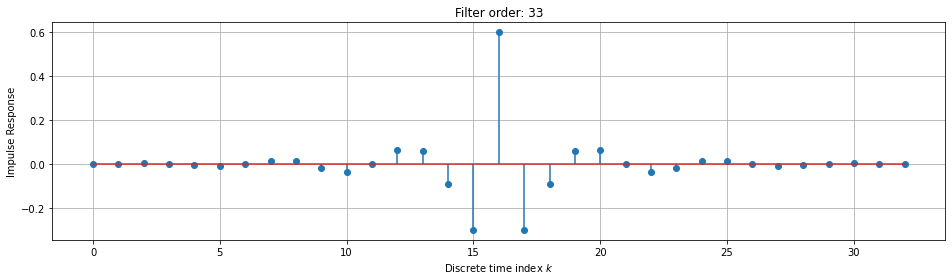

In [82]:
#Impulse Response of the Hamming window in High-pass filter for order m = 33

plt.figure(figsize=(16,4))               #set the size of the figure
plt.stem(x , use_line_collection=True)   #plotting impulse response with stem lines
plt.ylabel("Impulse Response")           #put name of y label
plt.xlabel("Discrete time index $k$")    #put name of x label
#plt.axis([0, 50, -1, 1])
plt.title("Filter order: " + str(order)) #put title of the figure
plt.grid()                               #configure the grid lines      


It can be seen from the figure that impulse response is symmetric for odd filter order $m = 33$. Therefore, this filter can be also called as Type 3 - Linear Phase filter a.k.a Even Symmetric. Centre value $c = h[\left(k-1 \right)/2] = h[16] = 0.6$. As you move from the $k = 16$ to the $k = 32$, the values fastly get closer to $0$ same as going from $k = 16$ to $k = 0$ due to the symmetry property. 

When you put the variable <code>x</code> at the end of the code above, you will see values of the coefficient $h(k)$ which is the impulse response of the system. Let's put it and analyse.


| **$k$** 	| **Symmetric $k$** 	|  **$h[k]$ (Scientific notation)** 	|
|:--------:	|:-----------------:|:------------:	|
| $k[0]$   	| $k[32]$           	|-1.51634974e-03|
| $k[1]$   	| $k[31]$           	|  1.15665272e-17      	|
| $k[2]$   	| $k[29]$           	| 2.49147992e-03      	|
| $k[3]$   	| $k[28]$           	| 2.27114601e-03       	|
| $\vdots$      |$\vdots$                | $\vdots$     	|
| $k[15]$   	| $k[17]$           	| -3.00589414e-01       |
| $k[16]$  	|  -           	         | 6.01068784e-01      	|

You will realise there are smaller coefficients than starting coefficient $h[0]$. For example $h[1]$ and $h[11]$ are too small as compared to $h[0]$ but they seem to be in the same position according to the figure. Centre coefficient $h[16]$ is greatest among them and it is equal to the $0.6$.  



<a id="task_function_generator_sine"></a>
<div class="alert alert-block alert-info">
    <strong><h3>Task 3: Determine group delay</h3></strong><br>
<ul>
<li>
 a) Group delay and linearity of a system are closely connected. Calculate and plot the group delay of the low-pass filter of Task 1 ( Hamming window ). Use the function <code>group_delay()</code>
</li>

It has some disadvantages in terms of high order of the filter $m$ and causes bad performance of the filter and  e.g. audio distortions, uncontrollable echoes

In [83]:
x = sig.firwin(Lw, Wn,  window='hamming') #FIR filter design using hamming window
w, h = sig.group_delay((x,256))           #compute the group delay of the filter

Please put <code>w, h</code> here, run and see the result. 

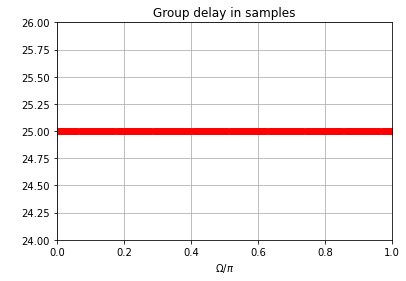

In [84]:
#Plotting of the group delay

plt.plot(w,h, 'or')                 #plot group delay 
 
plt.xlabel('$\Omega/\pi$')          #Omega/pi
plt.ylabel(' ')

plt.axis([0, 1, 24, 26])            #set the axis
plt.title('Group delay in samples') #put title of the figure 
plt.grid()                          #configure the grid lines


This figure depicts the group delay representation of the FIR low-pass filter for order  $m = 50$. Since group delay is equal to the $m/2$ in the linear phase FIR filters, the result must show $25$. It is constant with respect to normalised frequency $\Omega/\pi$. 

## References

1) [[OS89]](https://docs.scipy.org/doc/scipy/reference/signal.html) Oppenheim, A. V. and Schafer, R. W., “Discrete-Time Signal Processing”, Prentice-Hall, Englewood Cliffs, New Jersey (1989)
